## Wzory Turinga

Pojęcie wzorów Turinga zostało przedstawione przez angielskiego matematyka Alana Turinga w 1952 roku w artykule "The Chemical Basis of Morphogenesis". Praca opisywała potencajlny mechanizm powstawania w naturze wzorów, takich jak paski i spirale widoczne np. na zwierzętach. Turing rozważał zachowanie systemu złożonego z dwóch substancji, które oddziałują na siebie nawzajem poprzez mechanizm reakcji chemicznej (jedna substancja przechodzi w drugą i odwrotnie) oraz dyfuzji. Okazało się, że taki system prowadzi do powstawania wzorów niemal niezależnie od warunków początkowych. Turing postawił hipotezę, że takie zachowanie jest chemiczną podstawą morfogenezy.  
  
![](example_patterns.PNG)

W raporcie zaprezentowane zostanie rozwiązanie dwuwymiarowego równania reakcji-dyfuzji za pomocą metody różnic skończonych.

## Równanie dyfuzji
Zjawisko dyfuzji powoduje samorzutne rozprzestrzenianie się cząstek substancji, co prowadzi do wyrównania stężenia substancji w układzie. Cząsteczki substancji przemieszczają się z obszarów o dużej koncentracji do obszarów o małej koncentracji aż do ich wyrówania.  
Jest to opisane rówaniem dyfuzji:
$$
\frac{\partial C(r,t)}{\partial t}=D \nabla^2 C(r,t)
$$
gdzie:  
* $C(r,t)$ - stężenie substancji w punkcie r i czasie t;  
* $D(C,t)$ - współczynnik dyfuzji (stały).  

Dla jednego wymiaru równanie przyjmuje postać:
$$
\frac{\partial C(x,t)}{\partial t}=D\frac{\partial^2 C(x,t)}{\partial x^2}
$$
Równanie zostanie rozwiązane za pomocą schematu explicit metodą różnic skończonych.  
Pochodną po czasie można przybliżyć jako:
$$
\frac{\partial C(r,t)}{\partial t} \approx \frac{1}{dt} (C_{x,t+1} - C_{x,t})
$$

Drugą pochodną po $x$ (czyli Laplasjan) można przybliżyć jako:
$$
\frac{\partial^2 C(x,t)}{\partial x^2} \approx \frac{1}{dx^2} (C_{x+1,t} - 2C_{x,t} + C_{x-1,t})
$$
Zatem:
$$
C_{x, t+1} = C_{x, t} + dt (D \frac{1}{dx^2} (C_{x+1,t} - 2C_{x,t} + C_{x-1,t}))
$$
Przejdźmy do rozwiązania:

In [52]:
# Import bibliotek
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Funkcja licząca operato Laplace'a w przypadku jednowymiarowym:
def laplacian1D(a, dx):
    return (
        - 2 * a
        + np.roll(a,1,axis=0) 
        + np.roll(a,-1,axis=0)
    ) / (dx ** 2)


In [54]:
# Ustawienia symulacji:
width = 100     # szerokość domeny
dx = 10 / width # krok przestrzenny
T = 1           # czas symulacji
sigma = 0.9     # liczba Couranta, potrzebna do warunku CFL
nu = 0.5          # lepkość pełniąca funkcję współczynnika dyfuzji
dt = sigma * dx**2 / (2 * nu) #krok czasowy z uwzględnieniem warunku CFL
steps = int(T / dt) #liczba iteracji w czasie

In [55]:
# Przygotowanie danych do obliczeń:
X = np.linspace(-5, 5, width)
f = np.exp(-np.pi* X**2)  # przykładowa funkcja określająca stężenie początkowe (rozkład Gaussa)
f_an = np.exp(-0.5 * X**2) / pow(2*np.pi, 0.5)

In [56]:
# Funkcja przeprowadzająca obliczenia
def update(f):
    for i in range(steps):
        La = laplacian1D(f, dx)
        f += dt * nu * La 

Dla porównania, rozwiązanie analityczne równania dyfuzji dla rozkładu Gaussa ma postać:
$$
C(\boldsymbol{x}, t)=\frac{\left(2\pi\sigma_{0}^{2}\right)^{n/2} }{\left(2\pi(\sigma_{0}^{2} + 2 D t)\right)^{n/2}} 
C_0 \exp \left(-\frac{\left(\boldsymbol{x}-\boldsymbol{x}_{0}-\boldsymbol{u} t\right)^{2}}{2\left(\sigma_{0}^{2}+ 2 D t\right)}\right)
$$
​
gdzie:
​
* $C_0$ - stężenie początkowe,
* $n$ - liczba wymiarów, 
* $t$ - czas, 
* $D$ - współczynnik dyfuzji, 
* $\boldsymbol{u}$ - prędkość adwekcji (równa u nas 0)
* $\sigma_{0}$ wariancja rozkładu początkowego (równa 1).

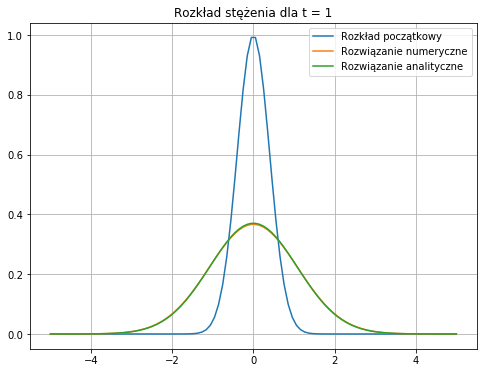

In [57]:
plt.figure(figsize=(8,6))
plt.plot(X, f, label = "Rozkład początkowy")
update(f)

# Rozwiązanie analityczne:
f_an = 1 / pow(2*np.pi*(1/2/np.pi+2*nu*T), 0.5) * np.exp(- (X**2) / (2*(1/2/np.pi+2*nu*T)))

# Wykres:
plt.plot(X, f, label = "Rozwiązanie numeryczne")
plt.plot(X, f_an, label = "Rozwiązanie analityczne")
plt.title("Rozkład stężenia dla t = " + str(T))
plt.grid()
plt.legend()

Jak widać, rówanie dyfuzji powoduje "rozmycie" rozkładu stężenia w czasie. Układ dąży do wyrównania stężeń.

## Równanie reakcji

Drugim zjawiskiem występującym w rozważanum układzie jest reakcja między dwoma substancjami. Opisana jest ona za pomocą równań FitzHugh-Nagumo:
$$
R_{a}(a,b) = a - a^3 - b + \alpha \\
R_{b}(a,b) = \beta (a - b)
$$
gdzie:  
* $R_{a}, R_{b}$ - Zmiany stężeń substancji a i b zależne tylko od lokalnych stężeń tych substancji
* $a, b$ - Lokalne stężenia substancji a i b
* $\alpha, \beta$ - Stałe współczynniki

Zatem rozwiązanie numeryczne ma postać:
$$
a_{t+1}=a_{t} + dt \cdot R_{a}(a_{t}, b_{t})
$$

In [58]:
# Inicjalizacja danych:

# Współczynniki:
alpha = 0.2  
beta = 5
# Stężenia początkowe
a0 = 0.1     
b0 = 0.7
# Ustawienia solvera
dt = 0.01
T = 5
steps = int(T / dt)
a = np.zeros(steps)
b = np.zeros(steps)
times = np.arange(steps) * dt

In [59]:
# Funkcje liczące zmiany stężeń:
def Ra(a, b):
    return a - a ** 3 - b + alpha
def Rb(a, b):    
    return (a - b) * beta

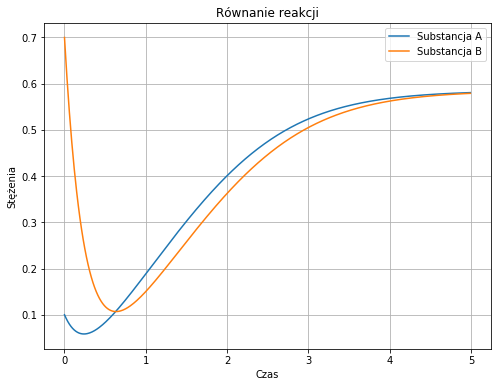

In [60]:
#Obliczenia:
a[0] = a0
b[0] = b0

for i in range(steps-1):
    a[i+1] = a[i] +  dt * Ra(a[i], b[i])
    b[i+1] = b[i] +  dt * Rb(a[i], b[i])

# Wykres   
plt.figure(figsize=(8,6))
plt.plot(times, a, label = "Substancja A")
plt.plot(times, b, label = "Substancja B")
plt.legend(loc = "best")
plt.xlabel("Czas")
plt.ylabel("Stężenia")
plt.title("Równanie reakcji")
plt.grid()

Jak widać, układ dąży do wyrównania stężeń na poziomie $a = b = \sqrt[3]{\alpha} = \sqrt[3]{0.2}  \approx 0.585$.

## Pełny model: reakcja + dyfuzja (1D)
Z połączenia członów dyfuzyjnego i reakcyjnego dostajemy równanie reakcji-dyfuzji:
$$
\frac{\partial a(x,t)}{\partial t} = D_{a} \cdot \frac{\partial^2 a(x,t)}{\partial x^2} +  R_{a}(a(x,t), b(x,t)) \\
\\
\frac{\partial b(x,t)}{\partial t} = D_{b} \cdot \frac{\partial^2 b(x,t)}{\partial x^2} +  R_{b}(a(x,t), b(x,t))
$$
gdzie:  
* $a,b$ - stężenia substancji;
* $D_{a}, D_{b}$ - współczynniki dyfuzji substancji a i b;
* $R_{a}, R_{b}$ - funkcje zmiany stężeń substancji a i b na skutek reakcji chemicznej.

In [61]:
# Współczynniki:
Da = 1
Db = 100
alpha = -0.005
beta = 10

In [62]:
# Ustawienia solvera:
width = 100
dx = 1
dt = 0.001
steps = 10000

(-0.8, 0.8)

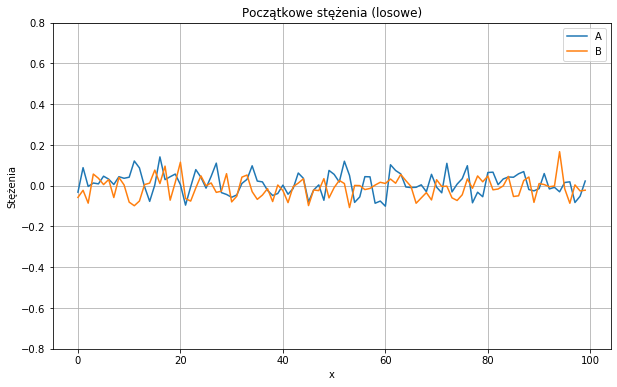

In [63]:
# Inicjalizacja stężeń (losowo):
a = np.random.normal(loc=0, scale=0.05, size=width)
b = np.random.normal(loc=0, scale=0.05, size=width)

# Wykres:
plt.figure(figsize=(10,6))
plt.plot(np.arange(width), a, label = "A")
plt.plot(np.arange(width), b, label = "B")
plt.legend(loc = "best")
plt.grid()
plt.title("Początkowe stężenia (losowe)")
plt.xlabel("x")
plt.ylabel("Stężenia")
plt.ylim([-0.8, 0.8])

(-0.8, 0.8)

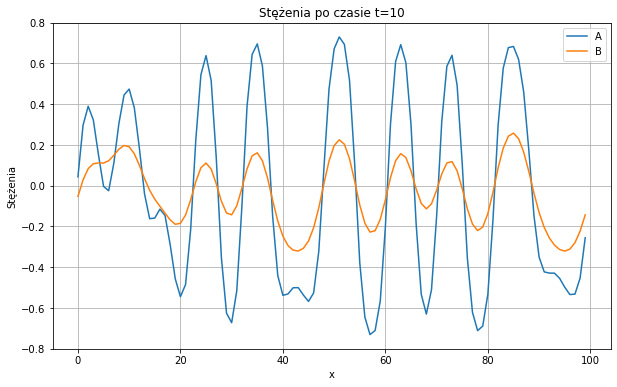

In [64]:
# Obliczenia:
t = 0
for i in range(steps):
    t += dt
    La = laplacian1D(a, dx)
    Lb = laplacian1D(b, dx)
    a += dt * (Da * La + Ra(a, b))
    b += dt * (Db * Lb + Rb(a, b))
    
# Wykres:
plt.figure(figsize=(10,6))
plt.plot(np.arange(width), a, label = "A")
plt.plot(np.arange(width), b, label = "B")
plt.legend(loc = "best")
plt.grid()
plt.title("Stężenia po czasie t="+str(round(t)))
plt.xlabel("x")
plt.ylabel("Stężenia")
plt.ylim([-0.8, 0.8])

Intuicja podpowiadałaby, że zarówno człon dyfuzyjny równania, jak i człon reakcyjny prowadzą do wyrównania stężeń, czyli układ powinien dążyć do stanu ustalonego. Tymczasem możemy zaobserwować, że stężenia tworzą wzory.  
Aby lepiej zobrazować zjawisko, stworzono wykresy po kilku odstępach czasu:

(-0.8, 0.8)

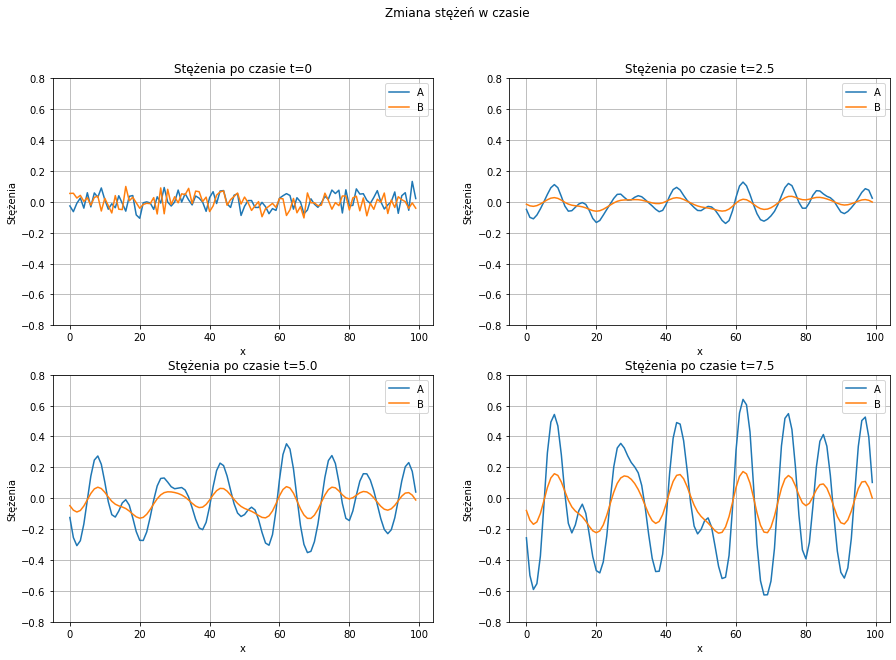

In [65]:
t = 0
a = np.random.normal(loc=0, scale=0.05, size=width)
b = np.random.normal(loc=0, scale=0.05, size=width)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.suptitle("Zmiana stężeń w czasie")
ax[0][0].plot(np.arange(width), a, label = "A")
ax[0][0].plot(np.arange(width), b, label = "B")
ax[0][0].legend(loc = "best")
ax[0][0].grid()
ax[0][0].set_title("Stężenia po czasie t="+str(round(t, 3)))
ax[0][0].set_xlabel("x")
ax[0][0].set_ylabel("Stężenia")
ax[0][0].set_ylim([-0.8, 0.8])

for i in range(int(steps / 4)):
    t += dt
    La = laplacian1D(a, dx)
    Lb = laplacian1D(b, dx)
    a += dt * (Da * La + Ra(a, b))
    b += dt * (Db * Lb + Rb(a, b))
    
ax[0][1].plot(np.arange(width), a, label = "A")
ax[0][1].plot(np.arange(width), b, label = "B")
ax[0][1].legend(loc = "best")
ax[0][1].grid()
ax[0][1].set_title("Stężenia po czasie t="+str(round(t, 3)))
ax[0][1].set_xlabel("x")
ax[0][1].set_ylabel("Stężenia")
ax[0][1].set_ylim([-0.8, 0.8])

for i in range(int(steps / 4)):
    t += dt
    La = laplacian1D(a, dx)
    Lb = laplacian1D(b, dx)
    a += dt * (Da * La + Ra(a, b))
    b += dt * (Db * Lb + Rb(a, b))
    
ax[1][0].plot(np.arange(width), a, label = "A")
ax[1][0].plot(np.arange(width), b, label = "B")
ax[1][0].legend(loc = "best")
ax[1][0].grid()
ax[1][0].set_title("Stężenia po czasie t="+str(round(t, 3)))
ax[1][0].set_xlabel("x")
ax[1][0].set_ylabel("Stężenia")
ax[1][0].set_ylim([-0.8, 0.8])

for i in range(int(steps / 4)):
    t += dt
    La = laplacian1D(a, dx)
    Lb = laplacian1D(b, dx)
    a += dt * (Da * La + Ra(a, b))
    b += dt * (Db * Lb + Rb(a, b))
    
ax[1][1].plot(np.arange(width), a, label = "A")
ax[1][1].plot(np.arange(width), b, label = "B")
ax[1][1].legend(loc = "best")
ax[1][1].grid()
ax[1][1].set_title("Stężenia po czasie t="+str(round(t, 3)))
ax[1][1].set_xlabel("x")
ax[1][1].set_ylabel("Stężenia")
ax[1][1].set_ylim([-0.8, 0.8])

## Pełny model 2D
Rozwiązanie równania reakcji-dyfuzji w dwóch wymiarach pozwala dużo lepiej zobrazować powstające wzory:

In [66]:
# Współczynniki:
Da = 1
Db = 100
alpha = -0.005
beta = 10

In [67]:
# Ustawienia solvera:
width = 300
height = 300
shape = (width, height)
dx = 1
dt = 0.001
steps = 20000

Text(0, 0.5, 'y')

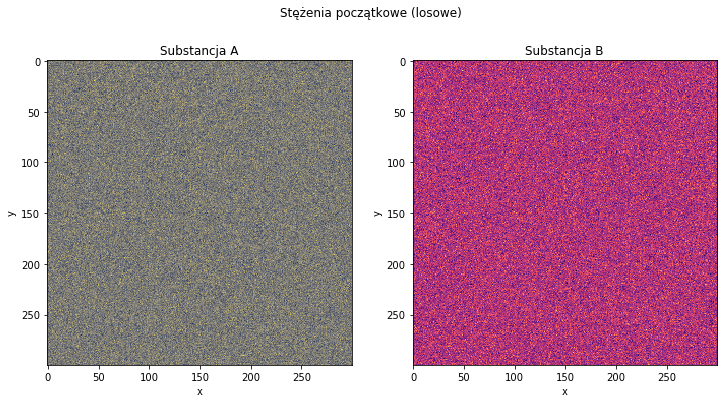

In [68]:
#inicjalizacja stężeń:
a = np.random.normal(loc=0, scale=0.05, size=shape)
b = np.random.normal(loc=0, scale=0.05, size=shape)

#wykresy:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax[0].imshow(a, cmap='cividis')
ax[1].imshow(b, cmap='magma')
plt.suptitle("Stężenia początkowe (losowe)")
ax[0].set_title("Substancja A")
ax[1].set_title("Substancja B")
ax[0].set_xlabel("x")
ax[1].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_ylabel("y")

In [69]:
# Funkcja licząca laplacian w 2D:
def laplacian2D(a, dx):
    return (
        - 4 * a
        + np.roll(a,1,axis=0) 
        + np.roll(a,-1,axis=0)
        + np.roll(a,+1,axis=1)
        + np.roll(a,-1,axis=1)
    ) / (dx ** 2)

In [70]:
# Obliczenia:
t = 0
for i in range(steps):
    t += dt
    La = laplacian2D(a, dx)
    Lb = laplacian2D(b, dx)
    a += dt * (Da * La + Ra(a, b))
    b += dt * (Db * Lb + Rb(a, b))

Text(0, 0.5, 'y')

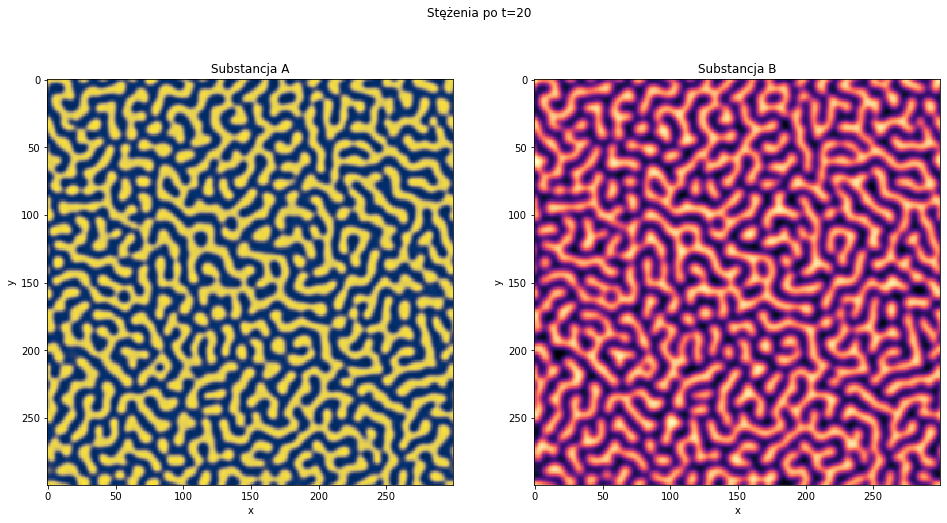

In [71]:
#wykresy:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].imshow(a, cmap='cividis')
ax[1].imshow(b, cmap='magma')
plt.suptitle("Stężenia po t="+str(round(t)))
ax[0].set_title("Substancja A")
ax[1].set_title("Substancja B")
ax[0].set_xlabel("x")
ax[1].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_ylabel("y")

Poniżej przedstawiono proces tworzenia wzorów w czasie:

Text(0, 0.5, 'Stężenia')

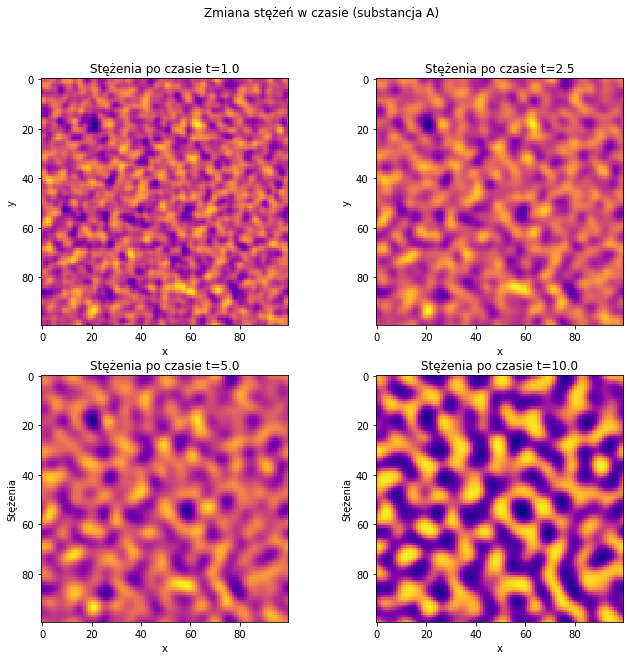

In [72]:
t = 0
width = 100
height = 100
shape = (width, height)
steps = 10000

a = np.random.normal(loc=0, scale=0.05, size=shape)
b = np.random.normal(loc=0, scale=0.05, size=shape)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11,10))
plt.suptitle("Zmiana stężeń w czasie (substancja A)")

for i in range(int(steps/10)):
    t += dt
    La = laplacian2D(a, dx)
    Lb = laplacian2D(b, dx)
    a += dt * (Da * La + Ra(a, b))
    b += dt * (Db * Lb + Rb(a, b))
    
ax[0][0].imshow(a, cmap='plasma')
ax[0][0].set_title("Stężenia po czasie t="+str(round(t, 3)))
ax[0][0].set_xlabel("x")
ax[0][0].set_ylabel("y")

for i in range(int(steps/(20/3))):
    t += dt
    La = laplacian2D(a, dx)
    Lb = laplacian2D(b, dx)
    a += dt * (Da * La + Ra(a, b))
    b += dt * (Db * Lb + Rb(a, b))
    
ax[0][1].imshow(a, cmap='plasma')
ax[0][1].set_title("Stężenia po czasie t="+str(round(t, 3)))
ax[0][1].set_xlabel("x")
ax[0][1].set_ylabel("y")

for i in range(int(steps/4)):
    t += dt
    La = laplacian2D(a, dx)
    Lb = laplacian2D(b, dx)
    a += dt * (Da * La + Ra(a, b))
    b += dt * (Db * Lb + Rb(a, b))
    
ax[1][0].imshow(a, cmap='plasma')
ax[1][0].set_title("Stężenia po czasie t="+str(round(t, 3)))
ax[1][0].set_xlabel("x")
ax[1][0].set_ylabel("Stężenia")

for i in range(int(steps/2)):
    t += dt
    La = laplacian2D(a, dx)
    Lb = laplacian2D(b, dx)
    a += dt * (Da * La + Ra(a, b))
    b += dt * (Db * Lb + Rb(a, b))
    
ax[1][1].imshow(a, cmap='plasma')
ax[1][1].set_title("Stężenia po czasie t="+str(round(t, 3)))
ax[1][1].set_xlabel("x")
ax[1][1].set_ylabel("Stężenia")

Widzimy już, jak zachowują się rówania i formują się wzory Turinga. Omówmy krótko, dlaczego tak sie dzieje.

## Układy aktywator-inhibitor

Aby zrozumieć przyczynę powstawania wzorów w układzie reakcji-dyfuzji, należy przeprowadzić analizę jego stabilności. Nie zostanie ona przedstawiona w tym raporcie, ponieważ nie jest to jego celem. Skorzystamy z gotowych wyników zaczerpniętych z literatury.  

Jak podano w artykule [2], układ jest stabilny, jeżeli po niewielkim wytrąceniu ze stanu równowagi, wraca samoczynnie do tego stanu. Aby w układzie reakcji-dyfuzji nastąpiło formowanie wzorów, musi być on niestabilny, czyli spełniać następujące warunki:  
* $r_{aa} + r_{bb} < 0$
* $r_{aa} r_{bb} - r_{ab} r_{ba} > 0$
* $d_{b} r_{aa} + d_{a} r_{bb} > 2 \cdot \sqrt{d_{a}d_{b}(r_{aa}r_{bb} - r_{ab}r_{ba})} > 0$  

gdzie:  

$r_{i,j} = \frac{\partial R_{i}(a,b)}{\partial j}$  

$d_{a}, d_{b}$ - współczynniki dyfuzji

Współczynniki dyfuzji są dodatnie, więc aby warunki pierwszy i trzeci były spełnione jednocześnie, wartości $r_{aa}$ i $r_{bb}$ muszą być różnych znaków oraz ta ze znakiem ujemnym musi być większa (co do modułu).  
Wtedy z drugiego warunku wynika, że również $r_{ab}$ i $r_{ba}$ muszą być różnych znaków.  
Ostatnim wnioskiem jest, że aby trzecie równanie było spełnione, współczynniki dyfuzji muszą być różne - jeżeli przykładowo $r_{aa}$ jest ujemne, wtedy stojące przy nim $d_{bb}$ musi być odpowiednio mniejsze od $d_{aa}$, aby cała lewa strona była większa od zera.  

Taki układ nazywamy układem **aktywator-inhibitor**. Działa on w następujący sposób: Niewielki wzrost stężenia jednej substancji, zwanej aktywatorem, w danym punkcie powoduje wzrost stężenia drugiej substancji, zwanej inhibitorem, w tym punkcie. Obie substancje jednocześnie dyfundują do sąsiednich obszarów, przy czym inhibitor dyfunduje szybciej, czym zmniejsza stężenie aktywatora w tych obszarach. To zmniejszenie stężenia aktywatora powoduje następnie zmniejszenie stężenia inhibitora itd. W efekcie zmiany stężeń rozprzestrzeniają się w przestrzeni jak fala, formując wzory. Kształt i wielkość wzorów zależy od parametrów układu ($D_{a}, D_{b}, \alpha, \beta$) oraz od warunków początkowych.

## Przykłady dla innych współczynników:

In [73]:
# Ubierzmy wcześniejszy kod w funkcję:
def patterns(Da, Db, alpha, beta, initializer, time):
    width = 100
    height = 100
    shape = (width, height)
    dx = 1
    dt = 0.001
    steps = int(time / dt)
    
    a, b = initializer(shape)
    def Ra(a, b):
        return a - a ** 3 - b + alpha
    def Rb(a, b):    
        return (a - b) * beta
    t = 0
    for i in range(steps):
        t += dt
        La = laplacian2D(a, dx)
        Lb = laplacian2D(b, dx)
        a += dt * (Da * La + Ra(a, b))
        b += dt * (Db * Lb + Rb(a, b))
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    ax[0].imshow(a, cmap='cividis')
    ax[1].imshow(b, cmap='magma')
    plt.suptitle("Stężenia po t="+str(round(t)))
    ax[0].set_title("Substancja A")
    ax[1].set_title("Substancja B")
    ax[0].set_xlabel("x")
    ax[1].set_xlabel("x")
    ax[0].set_ylabel("y")
    ax[1].set_ylabel("y")
   
    
def random_initializer(shape):
    a = np.random.normal(loc=0, scale=0.05, size=shape)
    b = np.random.normal(loc=0, scale=0.05, size=shape)
    return a, b

Dla współczynników $\alpha$ i $\beta$ równych 0:

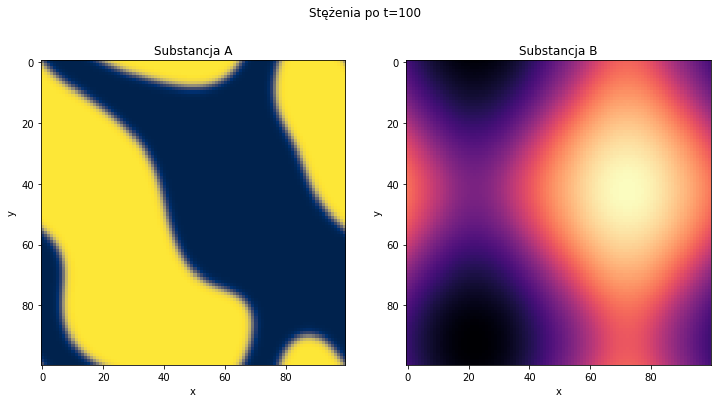

In [74]:
patterns(1, 100, 0, 0, random_initializer, time = 100)

Dla równych współczynników dyfuzji otrzymujemy układ stabilny - po długim czasie nie powstają wzory:

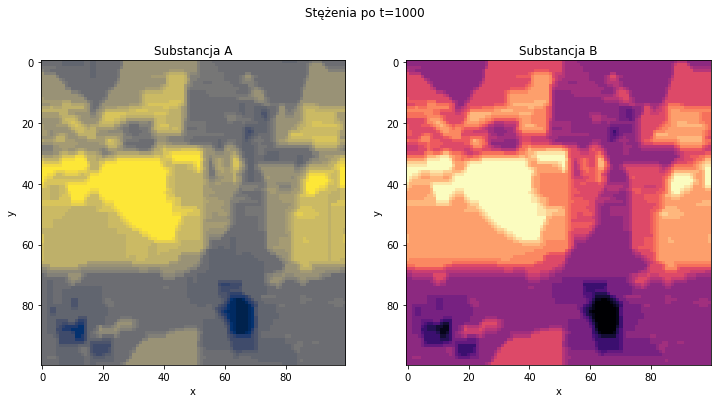

In [75]:
patterns(1, 1, -0.005, 10, random_initializer, time = 1000)

Inne kształty wzorów:

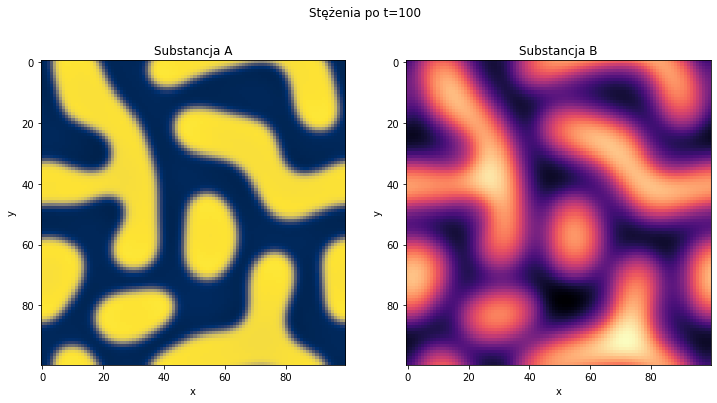

In [76]:
patterns(1, 50, -0.005, 0.25, random_initializer, time = 100)

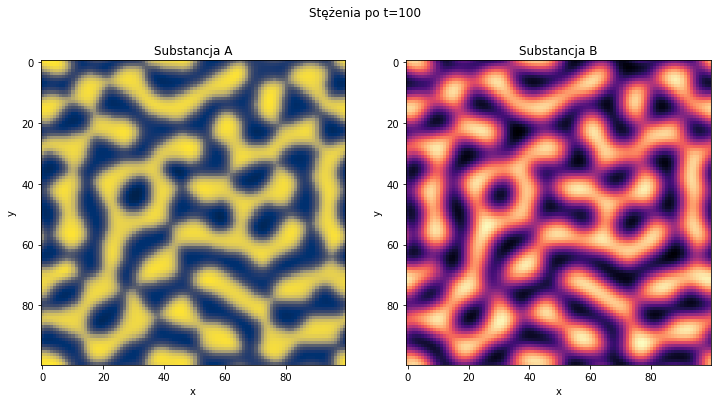

In [77]:
patterns(1, 100, 0.2, 5, random_initializer, time = 100)

## Źródła:
* [1] Ian Turing, *The Chemical Basis o Morphogenesis*, 1952
* [2] http://www.degeneratestate.org/posts/2017/May/05/turing-patterns/
* [3] https://en.wikipedia.org/wiki/Turing_pattern
* [4] https://en.wikipedia.org/wiki/Diffusion_equation
* [5] https://en.wikipedia.org/wiki/FitzHugh%E2%80%93Nagumo_model
* [6] https://en.wikipedia.org/wiki/Reaction%E2%80%93diffusion_system



Autor: Maciej Romański nr. albumu: 427604